# Exploratory Data Analysis (EDA)

In this notebook we are going to perform EDA on the processed dataset *'transactions_processed.csv'*. We will try to understand the data and its distribution with the main objective to find out the relationship between different features and the target variable.

### Remember that the dataset contains the following columns and our Target variable is `Is Fraudulent`:  

**1.Transaction ID:** A unique identifier for each transaction.  
**2.Customer ID:** A unique identifier for each customer.  
**3.Transaction Amount:** The total amount of money exchanged in the transaction.  
**4.Transaction Date:** The date and time when the transaction took place.  
**5.Payment Method:** The method used for payment (e.g., credit card, PayPal, etc.).  
**6.Product Category:** The category of the purchased product.  
**7.Quantity:** The quantity of purchased products.  
**8.Customer Age:** The age of the customer at the time of the transaction.  
**9.Customer Location:** The geographical location of the customer.  
**10.Device Used:** The type of device used to make the transaction (e.g., smartphone, desktop).  
**11.IP Address:** The IP address from which the transaction was made.  
**12.Shipping Address:** The physical address to where the product was shipped.  
**13.Billing Address:** The billing address associated with the payment method.  
**14.Is Fraudulent:** A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).  
**15.Account Age Days:** The age of the creation of the account.  
**16.Transaction Hour:** The hour of the day when the transaction occurred.  

### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

from scipy.stats import boxcox, probplot, chi2_contingency

import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

### 2. Loading the Data

In [3]:
os.chdir('..')
# original dataset
path = os.getcwd()+'/data/transactions.csv'
# small dataset
# path = os.getcwd()+'/data/transactions_processed_2.csv'

df = pd.read_csv(path, encoding='latin1')

In [4]:
df.head(10)

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Shipping Billing Same
0,42.32,PayPal,electronics,1,40,desktop,0,282,23,1
1,301.34,credit card,electronics,3,35,tablet,0,223,0,1
2,340.32,debit card,toys & games,5,29,desktop,0,360,8,0
3,95.77,credit card,electronics,5,45,mobile,0,325,20,1
4,77.45,credit card,clothing,5,42,desktop,0,116,15,1
5,345.27,PayPal,toys & games,1,9,desktop,0,251,13,1
6,53.69,debit card,toys & games,3,41,mobile,0,138,13,1
7,680.17,debit card,electronics,5,39,tablet,0,36,23,1
8,126.50,debit card,home & garden,4,35,mobile,0,188,4,1
9,47.18,bank transfer,toys & games,4,19,mobile,0,245,22,1


### 3. EDA 

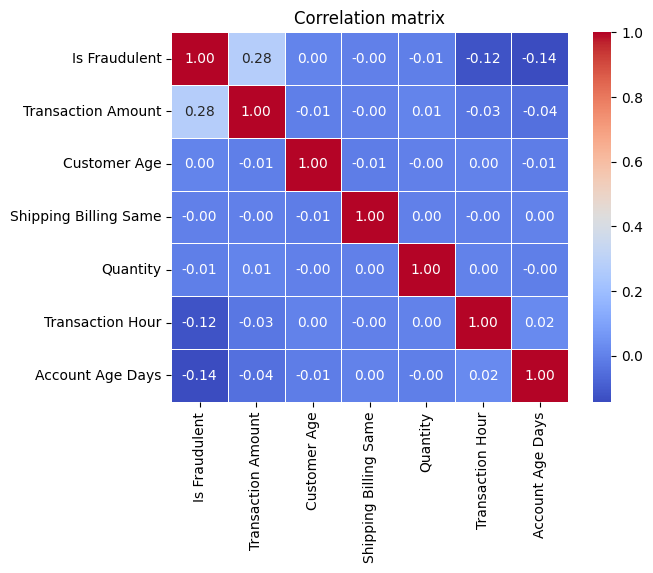

In [5]:
correlation = df.corr(numeric_only=True).sort_values(by='Is Fraudulent', ascending=False , axis= 0).sort_values(by='Is Fraudulent', ascending=False , axis= 1)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

#### 3.1. Univariable Analysis

Lets see the distribution of the target variable to understand the percentage of fraudulent transactions in the dataset.

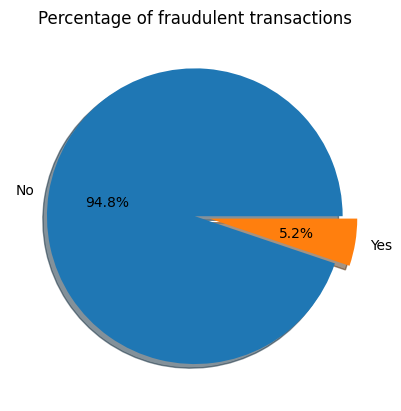

In [5]:
fraudulent_counts = df['Is Fraudulent'].value_counts()
fig = plt.pie(fraudulent_counts, labels=['No', 'Yes'], autopct='%1.1f%%',shadow= True, explode=(0, 0.1))
plt.title('Percentage of fraudulent transactions')
plt.show()


Also, check the distribution of categorical and discrete features

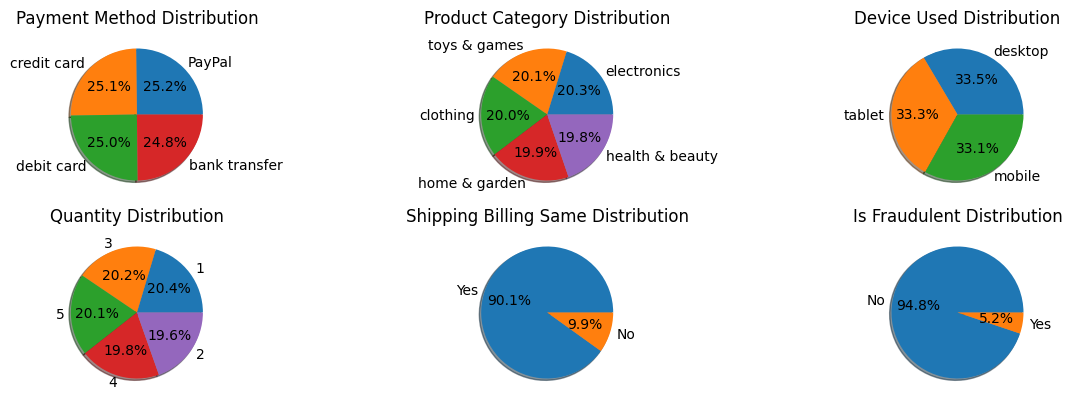

In [7]:
columns = ['Payment Method', 'Product Category', 'Device Used', 'Quantity', 'Shipping Billing Same', 'Is Fraudulent']
df_copy = df.copy()
df_copy['Shipping Billing Same']= df_copy['Shipping Billing Same'].apply(lambda x: 'Yes' if x == 1 else 'No')
df_copy['Is Fraudulent']= df_copy['Is Fraudulent'].apply(lambda x: 'Yes' if x == 1 else 'No')
plt.figure(figsize=(15, 15))
for i,feature in enumerate(columns):
    plt.subplot(len(columns),3,i+1)
    plt.pie(df_copy[feature].value_counts(), labels=df_copy[feature].unique(), autopct='%1.1f%%', shadow=True )
    plt.title(f'{feature} Distribution')
plt.show()

#### 3.2 Analysis of Target Variable

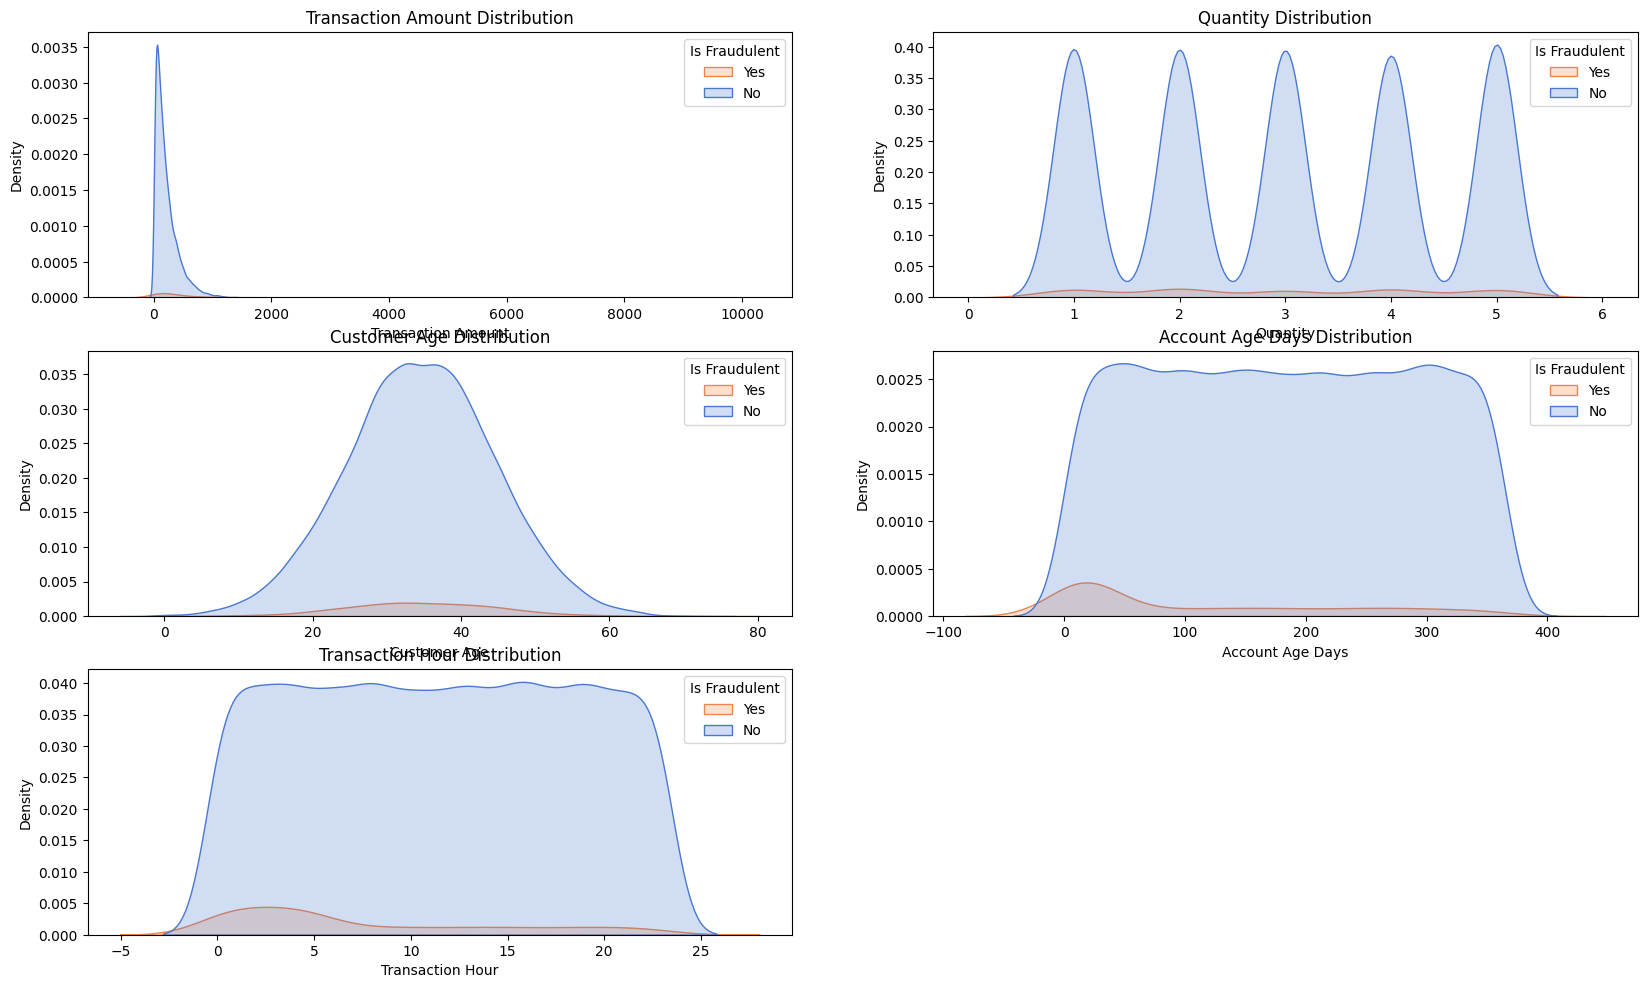

In [8]:
columns =['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days','Transaction Hour']
plt.figure(figsize=(20, 20))
for i,feature in enumerate(columns):
    plt.subplot(len(columns),2,i+1)
    sns.kdeplot(data=df_copy, x =feature ,hue='Is Fraudulent', fill=True, palette='muted')
    plt.legend(title='Is Fraudulent', labels=['Yes','No'])
    plt.title(f'{feature} Distribution')
plt.show()

Lets check the 'Account Age Days' feature, for understanding the distribution and what kind of transformation we can apply for best results in the machine learning model.

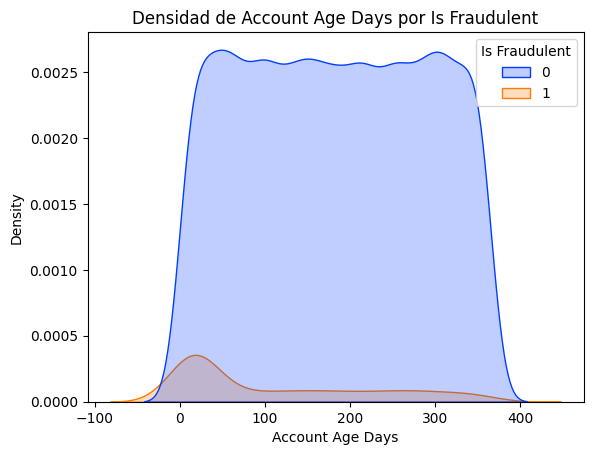

In [10]:
sns.kdeplot(data=df, x='Account Age Days', hue = 'Is Fraudulent' ,fill=True, palette="bright")
plt.title('Densidad de Account Age Days por Is Fraudulent')
plt.xlabel('Account Age Days')
plt.ylabel('Density')

plt.show()

Fraud Rate Group A: 0.23 %
Fraud Rate Group B: 0.03 %
Chi-square Statistic: 1766.1375511880476, P-value: 0.0


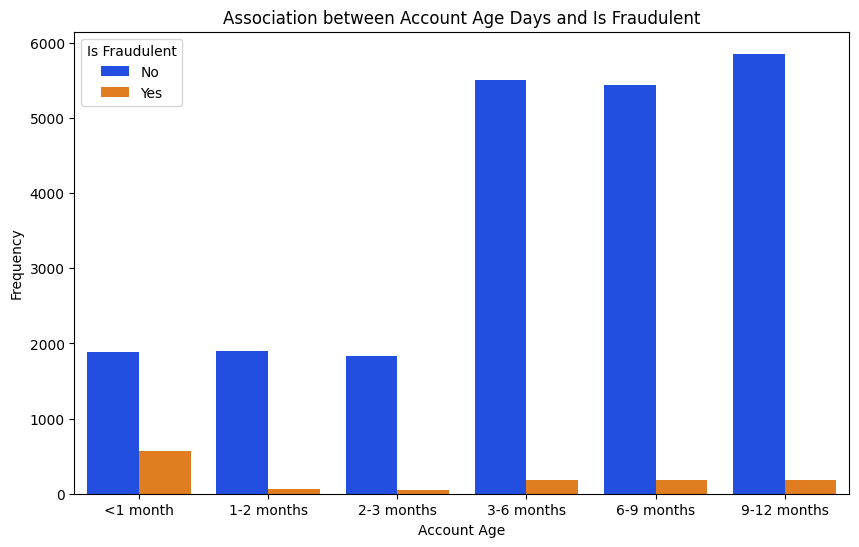

In [ ]:
# Create groups A and B
group_a = df[df['Account Age Days'] <= 30]
group_b = df[df['Account Age Days'] > 30]

# Calculate the proportion of frauds in each group and round to two decimal places
fraud_rate_a = round(group_a['Is Fraudulent'].mean(), 2)
fraud_rate_b = round(group_b['Is Fraudulent'].mean(), 2)

print(f"Fraud Rate Group A: {fraud_rate_a} %")
print(f"Fraud Rate Group B: {fraud_rate_b} %")

# Perform a chi-square test
contingency_table = pd.crosstab(df['Account Age Days'] <= 30, df['Is Fraudulent'])
chi2, p= chi2_contingency(contingency_table)[0:2]
print(f"Chi-square Statistic: {chi2}, P-value: {p}")

# bincut the account age days
account_age_bins = [0, 30, 60, 90, 180, 270, 365]
account_age_labels = ['<1 month', '1-2 months', '2-3 months', '3-6 months', '6-9 months', '9-12 months']

# Convert contingency table to a DataFrame 
contingency_table = pd.crosstab(df['Is Fraudulent'], pd.cut(df['Account Age Days'], bins=account_age_bins, labels=account_age_labels))

contingency_df = contingency_table.reset_index().melt(id_vars='Is Fraudulent', var_name='Account Age', value_name='Frequency')

# Create a graph
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Account Age', y='Frequency', hue='Is Fraudulent', data=contingency_df , palette='bright')
plt.title('Association between Account Age Days and Is Fraudulent')
plt.xlabel('Account Age')
plt.ylabel('Frequency')
# get the handles for fix the legend
handles, _ = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title='Is Fraudulent')
plt.show()

like we can see the fradulent transactions are making arround for account created in the last 50 days, let's go zoom in

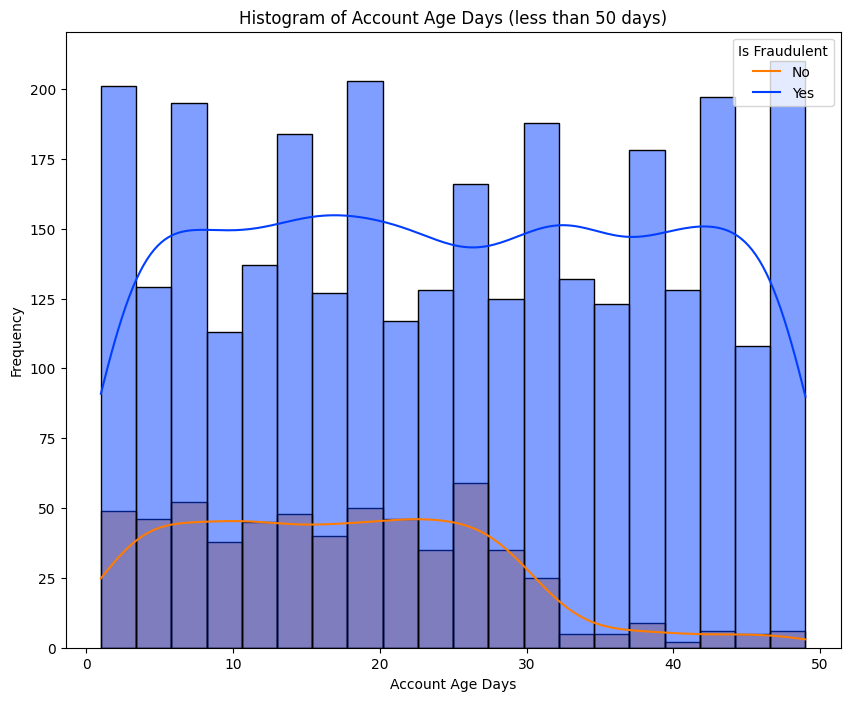

In [55]:
# Filter the data to include only those with less than 50 days
filtered_data = df[df['Account Age Days'] < 50]

plt.figure(figsize=(10, 8))
sns.histplot(filtered_data, x='Account Age Days', bins=20, kde=True, hue='Is Fraudulent', palette='bright')

plt.title('Histogram of Account Age Days (less than 50 days)')
plt.legend(title='Is Fraudulent', labels=['No', 'Yes'], loc='upper right')
plt.xlabel('Account Age Days')
plt.ylabel('Frequency')

plt.show()

the most fraudulent transactions are made by the customers who have created their account in the last  30 days?

- H0: There is no association between the account age (whether the account is 30 days old or less, or more than 30 days old) and the likelihood of a transaction being fraudulent.
- H1: There is an association between the account age and the likelihood of a transaction being fraudulent.

we are using the chi-square test to check the association between the account age and the likelihood of a transaction being fraudulent.

Fraud Rate Group A: 0.23 %
Fraud Rate Group B: 0.03 %
Chi-square Statistic: 1766.1375511880476, P-value: 0.0


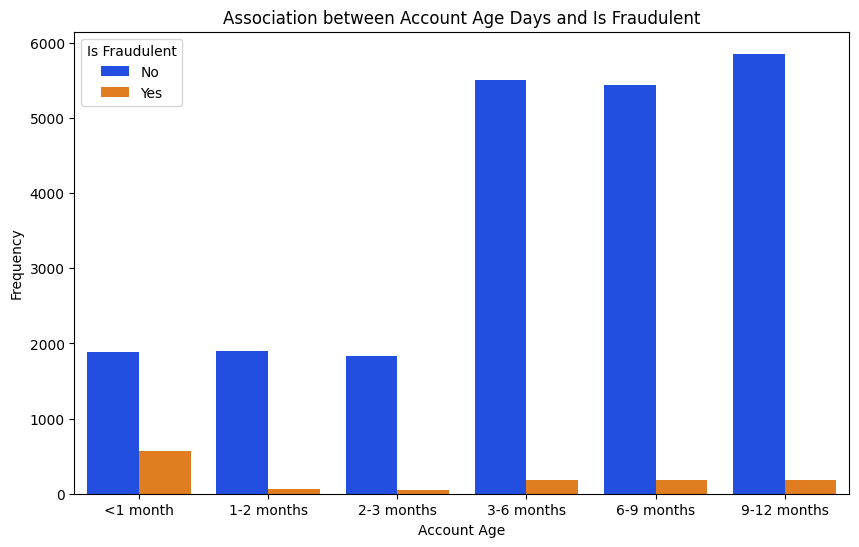

In [16]:
# Create groups A and B
group_a = df[df['Account Age Days'] <= 30]
group_b = df[df['Account Age Days'] > 30]

# Calculate the proportion of frauds in each group and round to two decimal places
fraud_rate_a = round(group_a['Is Fraudulent'].mean(), 2)
fraud_rate_b = round(group_b['Is Fraudulent'].mean(), 2)

print(f"Fraud Rate Group A: {fraud_rate_a} %")
print(f"Fraud Rate Group B: {fraud_rate_b} %")

# Perform a chi-square test
contingency_table = pd.crosstab(df['Account Age Days'] <= 30, df['Is Fraudulent'])
chi2, p= chi2_contingency(contingency_table)[0:2]
print(f"Chi-square Statistic: {chi2}, P-value: {p}")

# bincut the account age days
account_age_bins = [0, 30, 60, 90, 180, 270, 365]
account_age_labels = ['<1 month', '1-2 months', '2-3 months', '3-6 months', '6-9 months', '9-12 months']

# Convert contingency table to a DataFrame 
contingency_table = pd.crosstab(df['Is Fraudulent'], pd.cut(df['Account Age Days'], bins=account_age_bins, labels=account_age_labels))

contingency_df = contingency_table.reset_index().melt(id_vars='Is Fraudulent', var_name='Account Age', value_name='Frequency')

# Create a graph
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Account Age', y='Frequency', hue='Is Fraudulent', data=contingency_df , palette='bright')
plt.title('Association between Account Age Days and Is Fraudulent')
plt.xlabel('Account Age')
plt.ylabel('Frequency')
# get the handles for fix the legend
handles, _ = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title='Is Fraudulent')
plt.show()

since the p-value is less than 0.05, we reject the null hypothesis and conclude there is an association between the account age less than 30 days and the likelihood of a transaction being fraudulent.

And also see there is a 22% of fraudulent transactions made by the customers who have created their account in the last 30 days.

In [ ]:
#Create a new column 'Account Age Range' with the following bins, for use to best performance in the model

bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]
labels = [f"{i}-{j}" for i, j in zip(bins[:-1], bins[1:])]

df['Account Age Range'] = pd.cut(df['Account Age Days'], bins=bins, labels=labels, right=False)


And do the same test for the Transaction Hour, is there any association between the transaction hour do it before 6am and the likelihood of a transaction being fraudulent?

Fraud Rate Group A: 0.1 %
Fraud Rate Group B: 0.03 %
Chi-square Statistic: 496.1560136109154, P-value: 6.521545721924948e-110


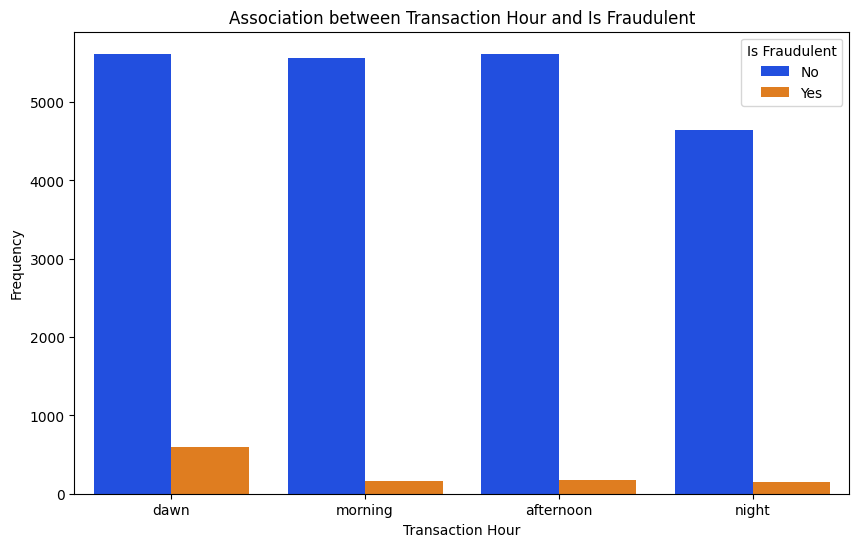

In [25]:
# Create groups A and B
group_a = df[df['Transaction Hour'] <= 6]
group_b = df[df['Transaction Hour'] > 6]

# Calculate the proportion of frauds in each group and round to two decimal places
fraud_rate_a = round(group_a['Is Fraudulent'].mean(), 2)
fraud_rate_b = round(group_b['Is Fraudulent'].mean(), 2)

print(f"Fraud Rate Group A: {fraud_rate_a} %")
print(f"Fraud Rate Group B: {fraud_rate_b} %")

contingency_table = pd.crosstab(df['Transaction Hour'] <= 6, df['Is Fraudulent'])
chi2, p= chi2_contingency(contingency_table)[0:2]

print(f"Chi-square Statistic: {chi2}, P-value: {p}")

# Create a contingency table
bins = [0, 6, 12, 18, 24]
labels = ['dawn', 'morning', 'afternoon', 'night']
# bins = [0, 6 , 12, 18, 24]
# labels = [f"{i}-{j} hours" for i, j in zip(bins[:-1], bins[1:])]
contingency_table = pd.crosstab(df['Is Fraudulent'], pd.cut(df['Transaction Hour'], bins=bins, labels=labels))

contingency_df = contingency_table.reset_index().melt(id_vars='Is Fraudulent', var_name='Transaction Hour', value_name='Frequency')

# Create a graph
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Transaction Hour', y='Frequency', hue='Is Fraudulent', data=contingency_df , palette='bright')
plt.title('Association between Transaction Hour and Is Fraudulent')
plt.xlabel('Transaction Hour')
plt.ylabel('Frequency')
# get the handles for fix the legend
handles, _ = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title='Is Fraudulent')
plt.show()

In [ ]:
#create a new column 'Transaction Hour Range' with the following bins, for use to best performance in the model
bins = [0, 6 , 12, 18, 24]
labels = [f"{i}-{j} hours" for i, j in zip(bins[:-1], bins[1:])]
df['Transaction Hour Range'] = pd.cut(df['Transaction Hour'], bins=bins, labels=labels, right=False)

Now let's see the relationship between the categorical and discrete variables and the target variable.

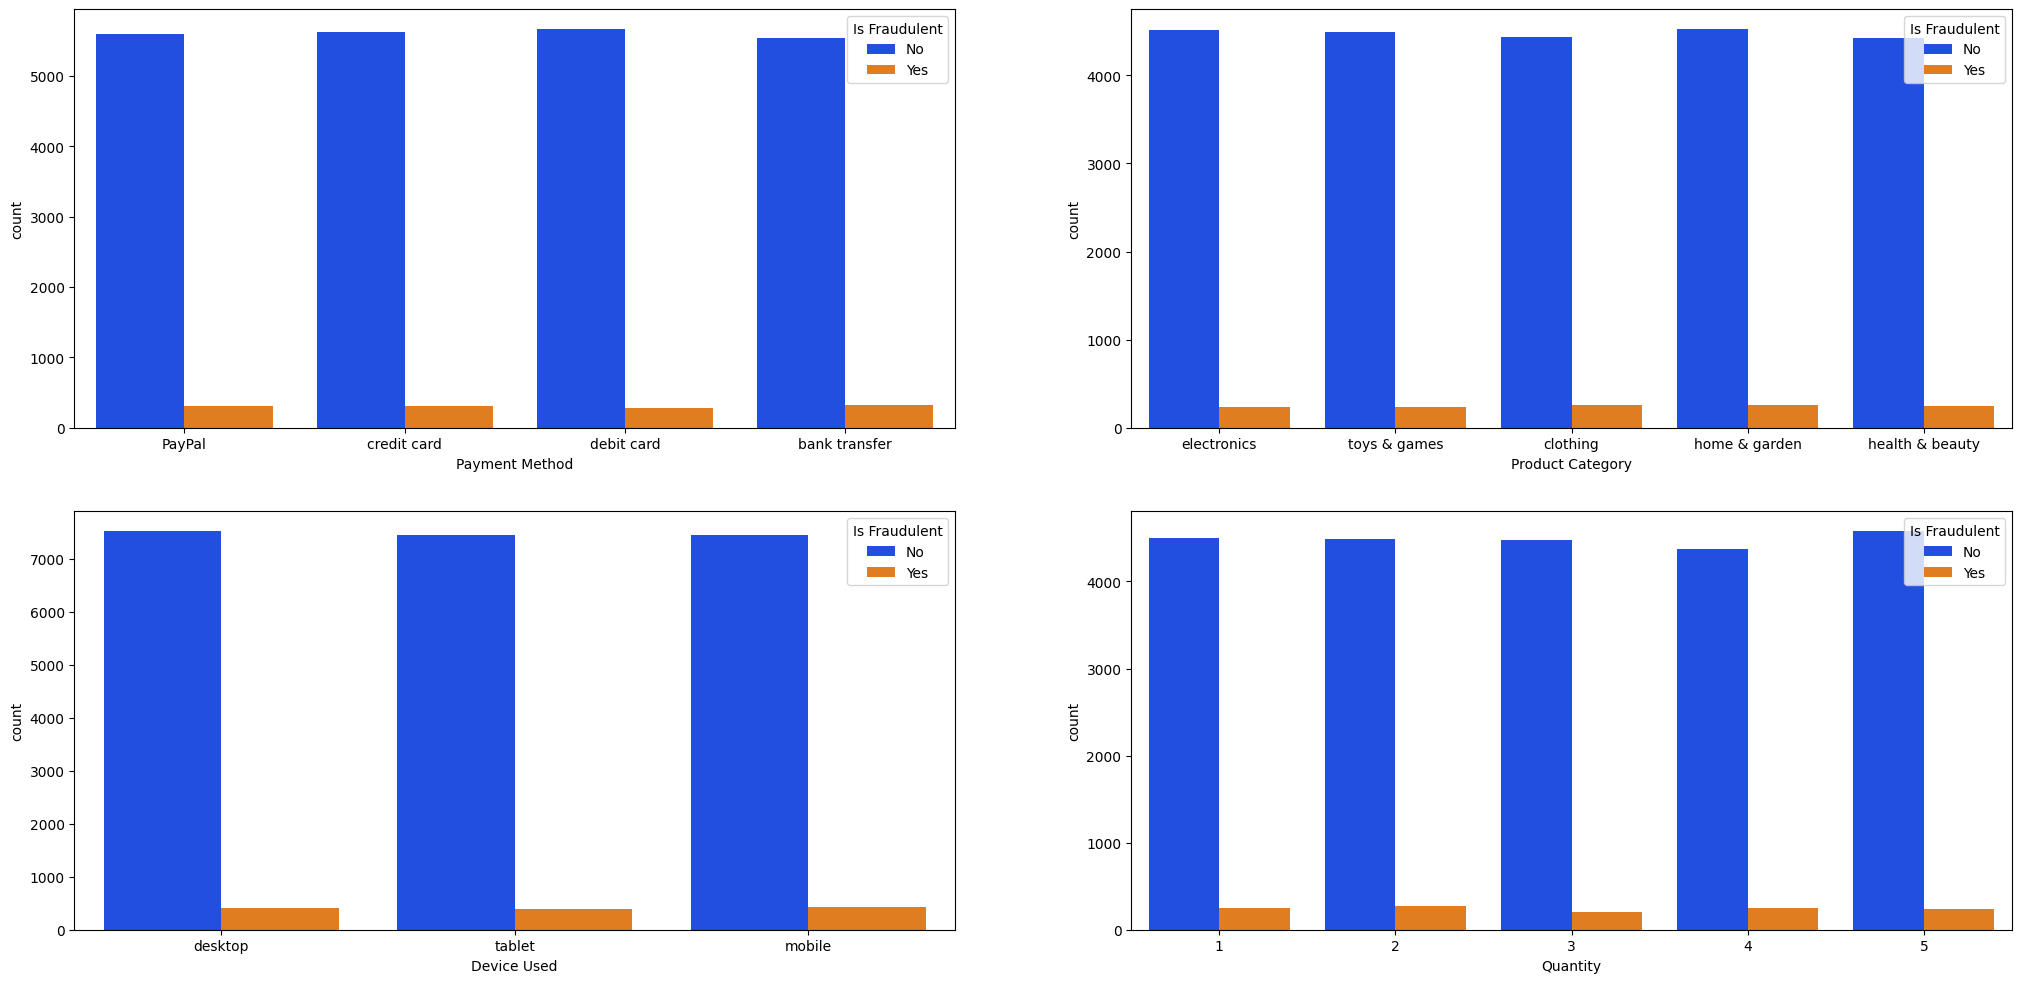

In [30]:
columns=[ 'Payment Method', 'Product Category', 'Device Used', 'Quantity']
plt.figure(figsize=(25, 25))
for i,feature in enumerate(columns):
    plt.subplot(len(columns),2,i+1)
    sns.countplot(x=feature ,hue='Is Fraudulent',data=df_copy , palette='bright')
plt.show() 

is nothing revelant to see, is the same proportion of fradulent on the variables

### Conclusion
- The dataset is imbalanced with 0.5% of fraudulent transactions.
- The account age and transaction hour are associated with the likelihood of a transaction being fraudulent.
- The account age less than 30 days and the transaction hour before 6 am are associated with the likelihood of a transaction being fraudulent.